# Tabular Financial Statements Data EDA

In [1]:
# Packages
import pandas as pd
import numpy as np

In [2]:
# Load data
tf = pd.read_parquet(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\combined_corrected_tabular_financial_statements_data.parquet')

### Comparing Variables to the Graph NN Paper

In [3]:
# Briefly summarize ratio variables and Altman Z-Score to check construction
# use describe method, transpose, and print all rows
# round to two decimal places, no scientific notation, commas for thousands
pd.options.display.float_format = '{:,.2f}'.format
sum_stats_ratios = tf[['Ratio_A', 'Ratio_B', 'Ratio_C', 'Ratio_D', 'Ratio_E', 'Altman_Z']].describe().T
sum_stats_ratios

,count,mean,std,min,25%,50%,75%,max
Ratio_A,"19,793.00",0.02,0.02,-0.02,0.01,0.02,0.03,0.08
Ratio_B,"19,793.00",0.22,0.16,0.04,0.10,0.18,0.29,0.73
Ratio_C,"17,703.00",2.15,2.09,0.29,0.78,1.44,2.66,8.77
Ratio_D,"20,075.00",0.14,0.16,-0.12,0.02,0.11,0.24,0.57
Ratio_E,"20,312.00",0.19,0.32,-0.64,0.00,0.16,0.37,1.02
Altman_Z,"16,983.00",2.01,1.49,-0.87,0.98,1.64,2.62,8.14


In [4]:
# Checking normalized average fianncial value to compare to the graph NN paper's table A.1
# Empty dataframe to store item, count, and percent_of_total_assets
table_a1_replication = pd.DataFrame(columns=['Item', 'Count', 'Percent_of_Total_Assets'])
# Compute average values of: totalAssets, currentLiabilities, totalLiabilities, totalEquity, retainedEarnings, currentAssets, netSales (revenue stand-in), EBIT (ebitda minus depreciation, etc),  market value of equity (commonStock + preferredStock stand-in), workingCapital, and Altman_Z
# Mean of total assets, removing missing and infinite values
total_assets_mean = tf['totalAssets'].replace([np.inf, -np.inf], np.nan).dropna().mean()
# Loop over each variable
# Drop missing or infinite values
# Compute count and mean
for variable in ['totalAssets', 'totalCurrentLiabilities', 'totalLiabilities', 'totalEquity', 'retainedEarnings', 'totalCurrentAssets', 'revenue', 'EBIT', 'marketCap', 'workingCapital']:
    var_count = tf[variable].replace([np.inf, -np.inf], np.nan).dropna().count()
    var_mean = tf[variable].replace([np.inf, -np.inf], np.nan).dropna().mean()
    table_a1_replication = pd.concat([table_a1_replication, pd.DataFrame({'Item': variable, 'Count': var_count, 'Percent_of_Total_Assets': 100*var_mean/total_assets_mean}, index=[0])])

table_a1_replication

C:\Users\ijyli\AppData\Local\Temp\ipykernel_26324\317268136.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table_a1_replication = pd.concat([table_a1_replication, pd.DataFrame({'Item': variable, 'Count': var_count, 'Percent_of_Total_Assets': 100*var_mean/total_assets_mean}, index=[0])])


,Item,Count,Percent_of_Total_Assets
0,totalAssets,20312,100.00
0,totalCurrentLiabilities,20414,18.96
0,totalLiabilities,20414,61.46
0,totalEquity,20825,34.20
0,retainedEarnings,20825,21.83
0,totalCurrentAssets,20312,27.53
0,revenue,20256,17.86
0,EBIT,20256,1.96
0,marketCap,18034,136.18
0,workingCapital,20075,8.66


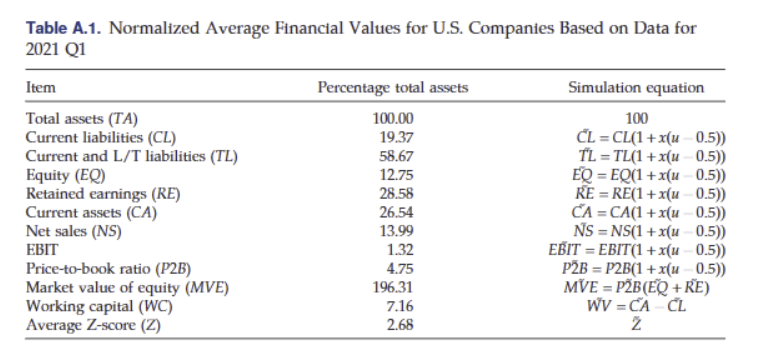